In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_selection import mutual_info_regression


np.random.seed(42)
os.environ["PYTHONWARNINGS"] = "ignore::UserWarning"
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=UserWarning)

In [2]:
train_df=pd.read_csv('train.csv')
# train_df['mileage'] = np.log1p(train_df['mileage'].values)
# train_df['d'] = np.log1p(train_df['d'].values)
# train_df['newprice'] = np.log1p(train_df['newprice'].values)
# train_df['price'] = np.log1p(train_df['price'].values)

types=list(train_df.columns)

    
train_feature_l = [str(i).split('*') for i in train_df['l'].values]

train_df = pd.concat([train_df, pd.DataFrame(train_feature_l, columns=['l1', 'l2', 'l3'])], axis=1)
train_pl=pd.DataFrame(PolynomialFeatures(interaction_only=True,include_bias=False).fit_transform(train_df[['l1','l2','l3']].to_numpy()))
train_pl.columns=['l1','l2','l3','l4','l5','l6']

train_df.drop(columns = ['l','l1','l2','l3'], inplace=True)
train_df=pd.concat([train_df,pd.DataFrame(train_pl)],axis=1)


dict_k={}
list_k=list(train_df['k'].unique())
for i in range(len(list_k)):
    dict_k[list_k[i]]=i

train_df['k']=train_df['k'].map(lambda x: dict_k[x])
    

numerical=['carid', 'e', 'transferCount', 'd', 'seatings', 'mileage', 'b', 'oiltype', 'newprice', 'maketype', 'm', 'gearbox', 'n', 'displacement', 'tradeTime', 'registerDate', 'licenseDate', 'modelyear', 'g','l1','l2','l3','l4','l5','l6']
date=['tradeTime', 'registerDate', 'licenseDate', 'modelyear','g','o']
category_type=list(set(train_df.columns)-set(numerical)-set(['price']))
for feature in date:
    train_df[feature] = pd.to_numeric(pd.to_datetime(train_df[feature])).values
    
# robsc = RobustScaler()
# temp_X = robsc.fit_transform(train_df[numerical].to_numpy())
# train_df.drop(columns=numerical, inplace=True)
# train_df = pd.concat([pd.DataFrame(train_df), pd.DataFrame(temp_X, columns=numerical)], axis=1)
print(category_type)
print(numerical)

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
train_df.to_csv('111.csv')

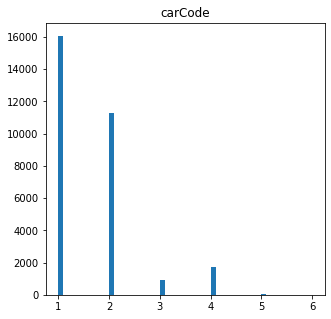

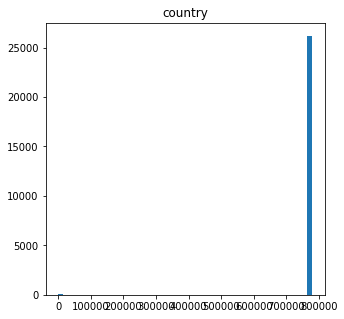

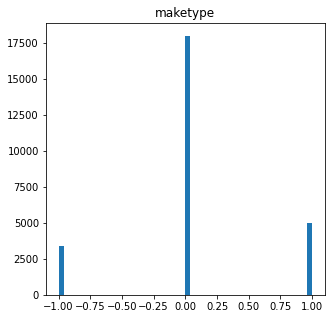

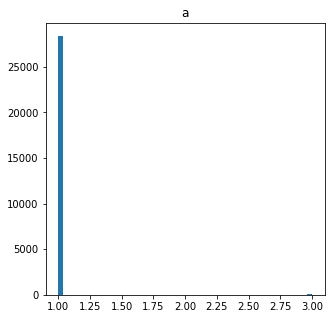

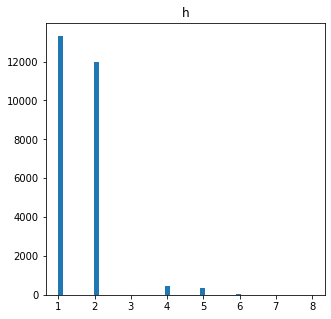

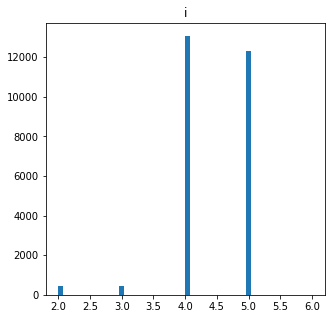

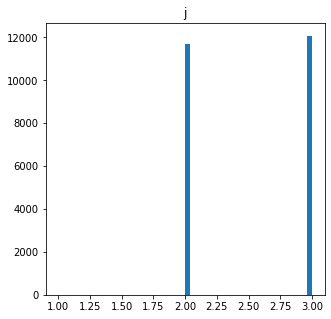

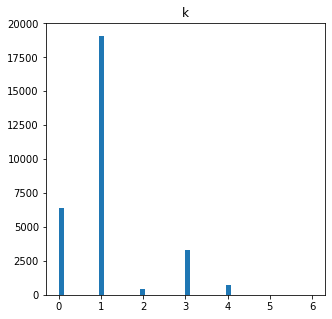

In [ ]:
num_bins = int(np.floor(1+(3.3)*(np.log2(len(train_df)))))
for i in ['carCode', 'country','maketype','a','h','i','j','k']:
    train=pd.DataFrame(train_df[i])
    _ = train.hist(column = train.columns, grid=False, figsize = (5,5), bins=num_bins)

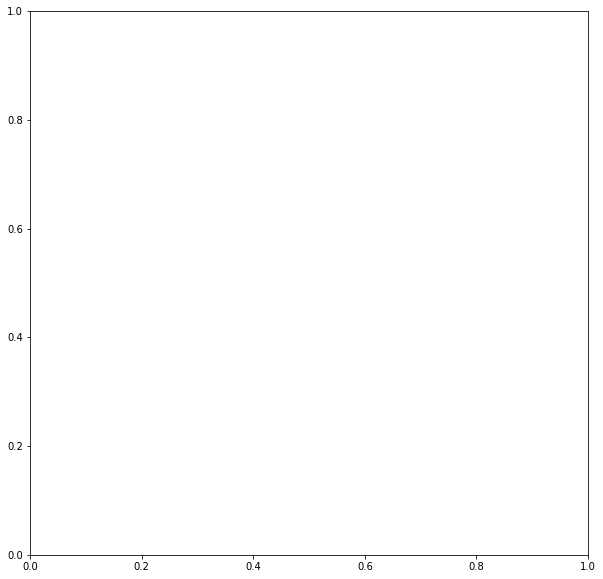

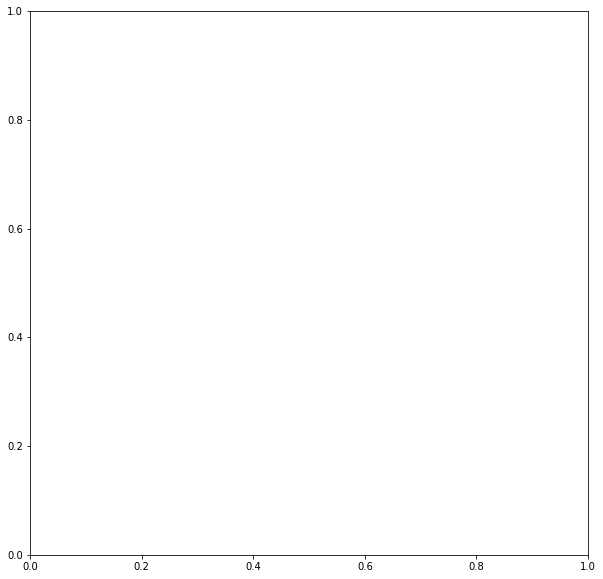

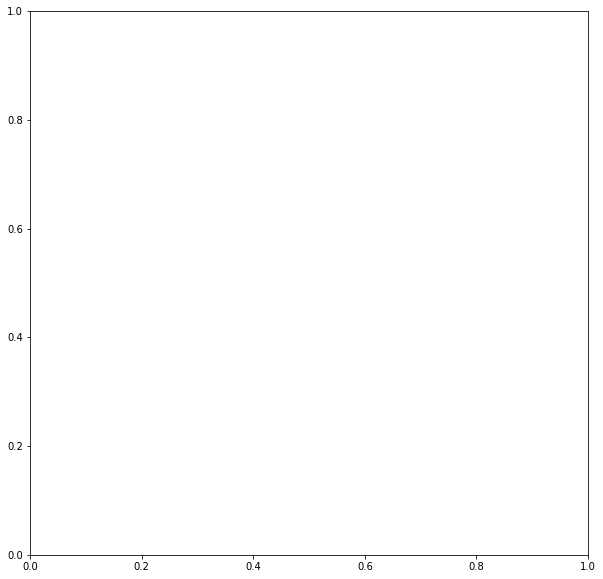

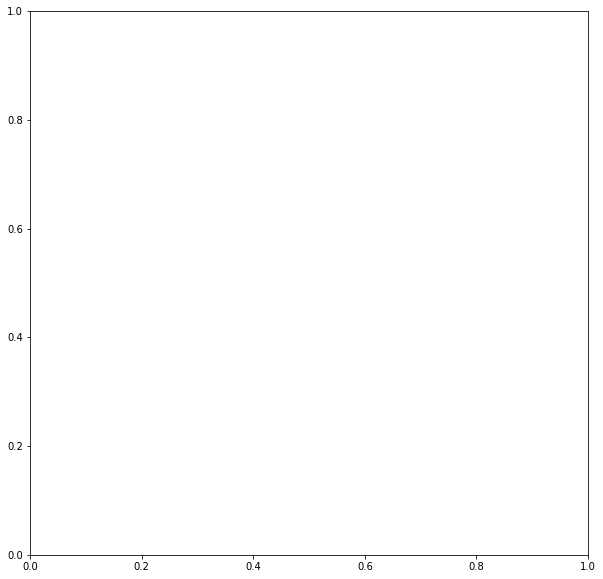

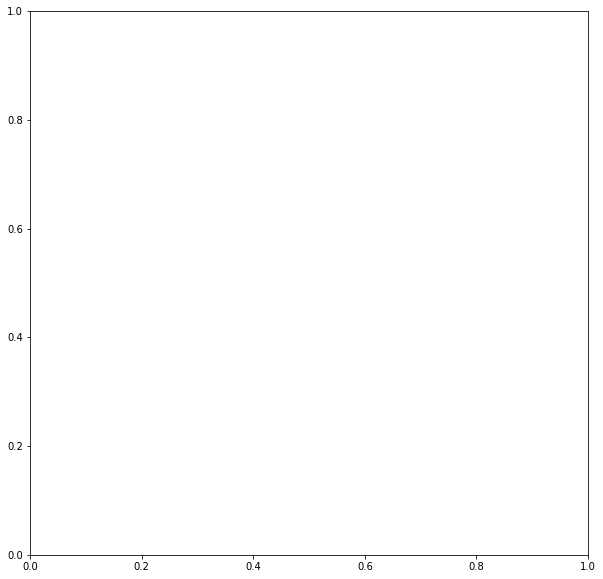

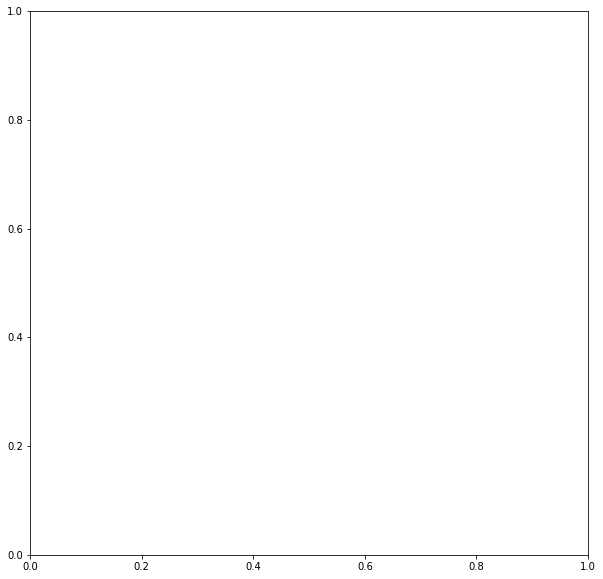

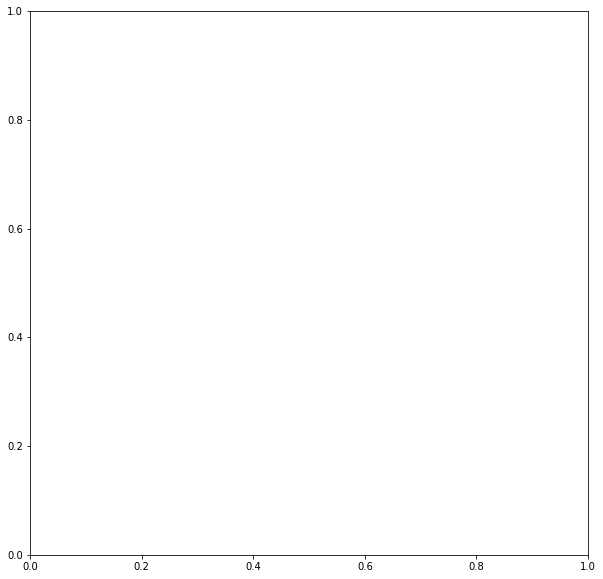

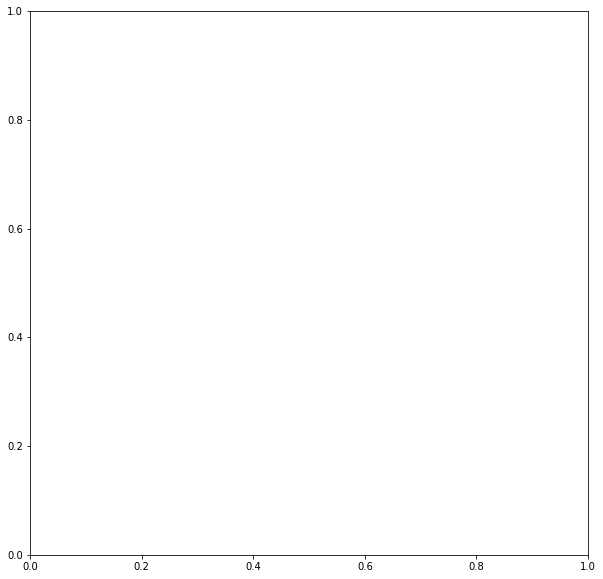

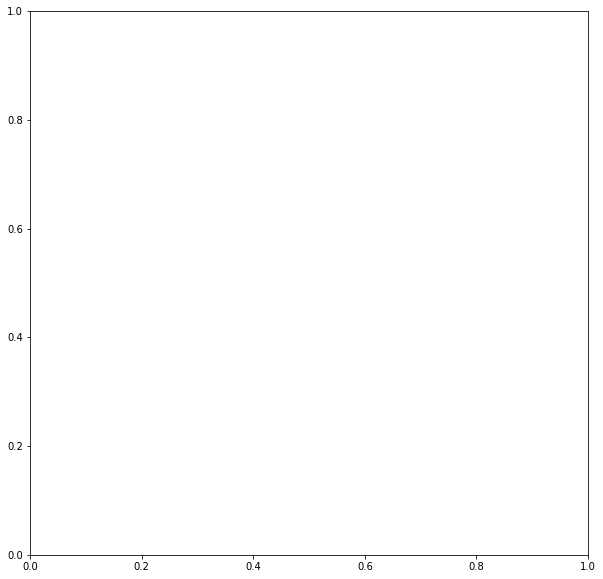

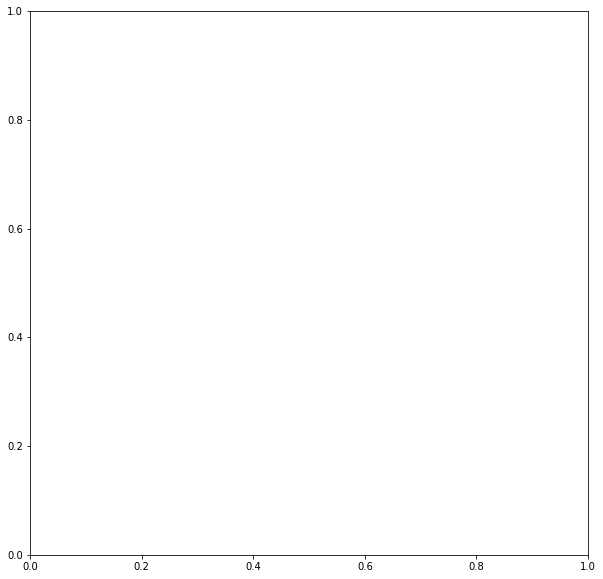

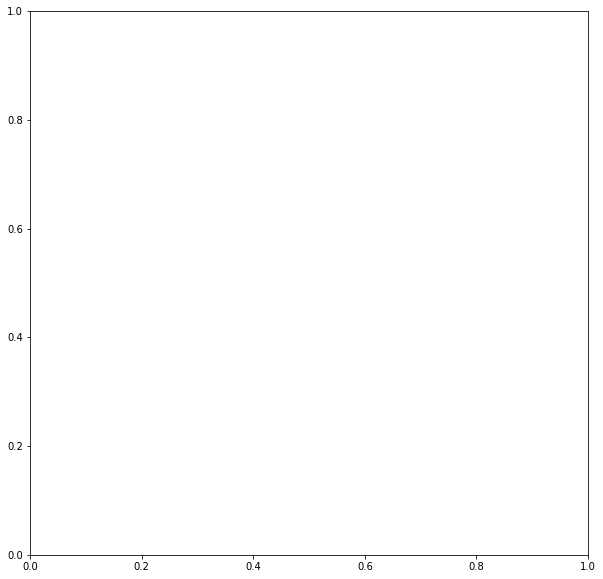

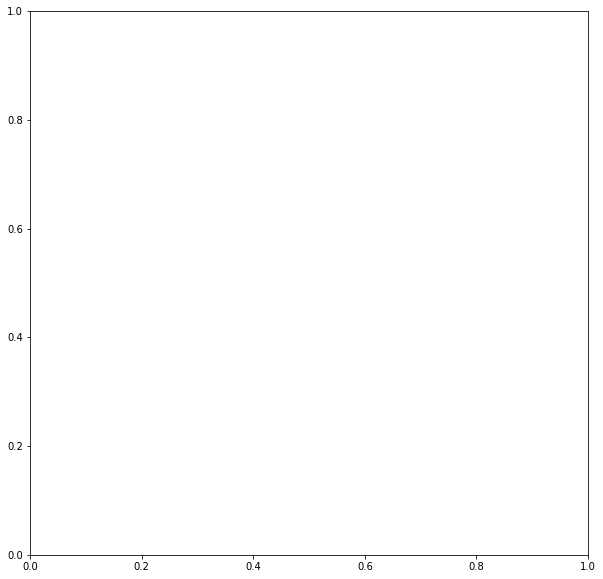

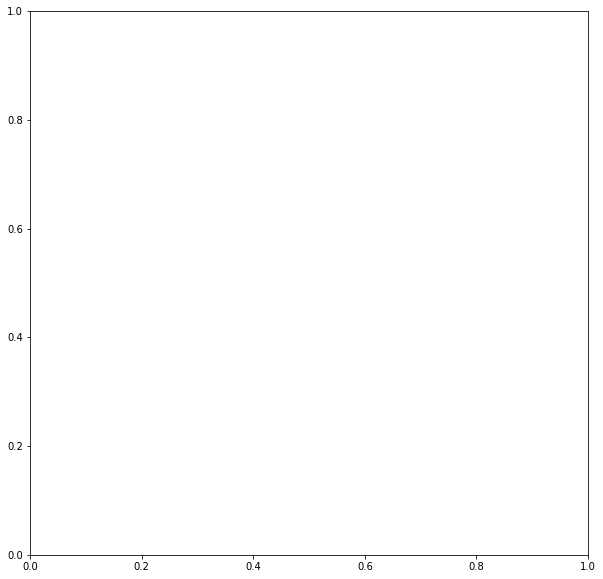

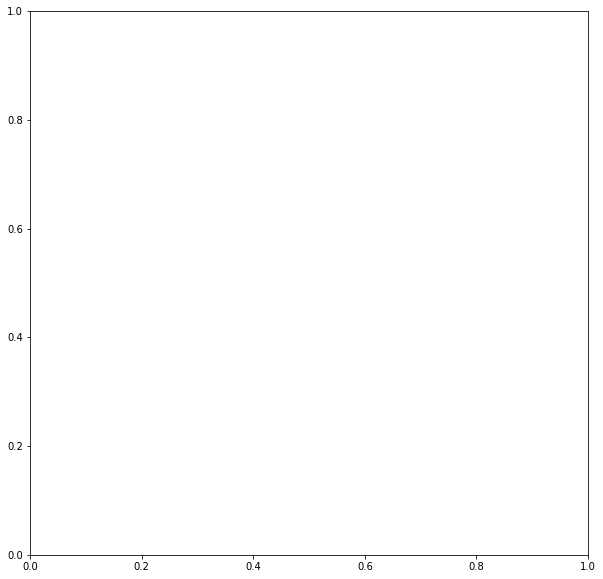

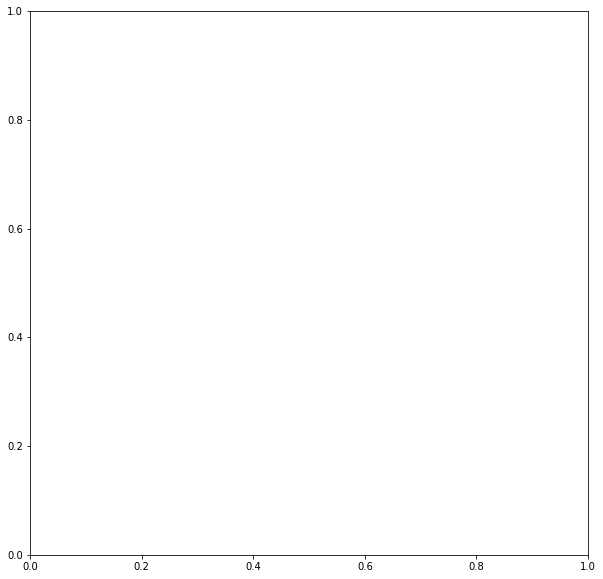

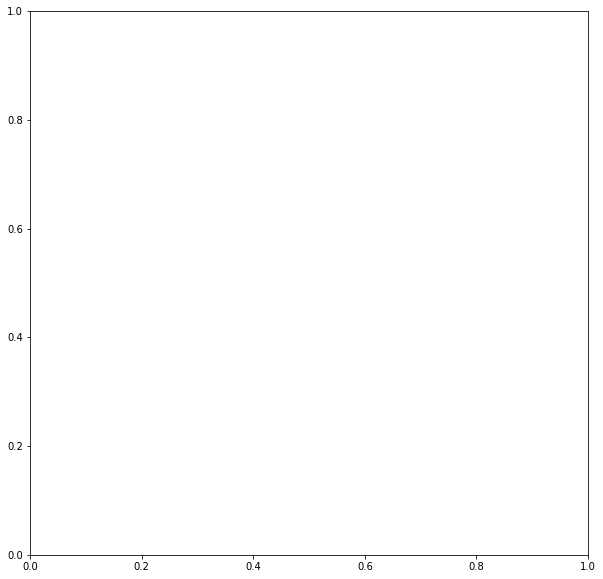

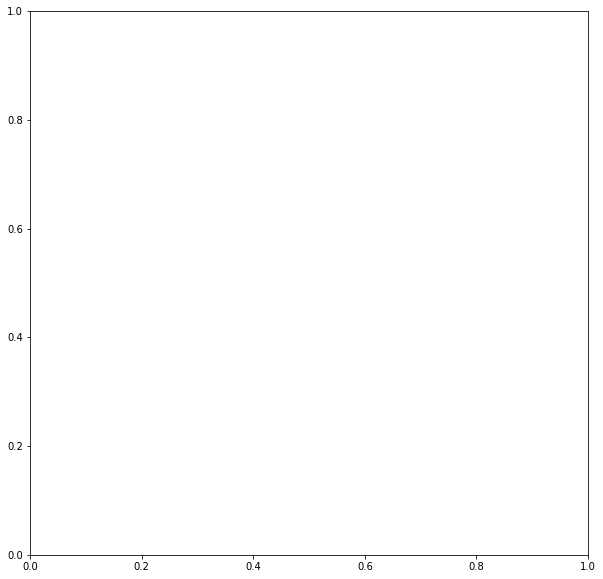

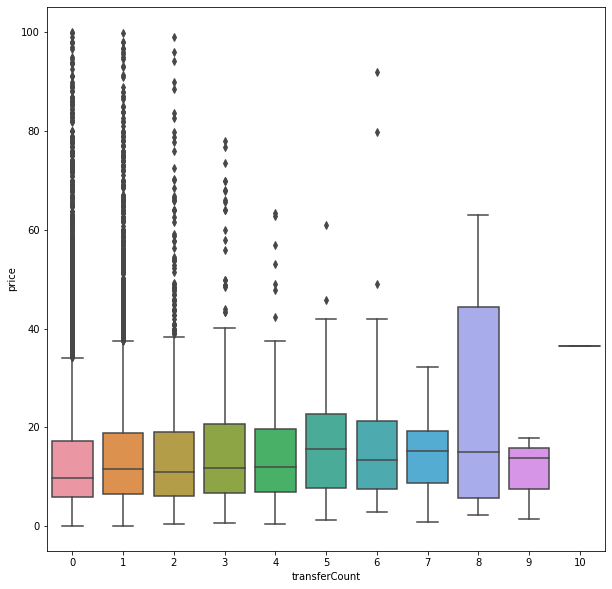

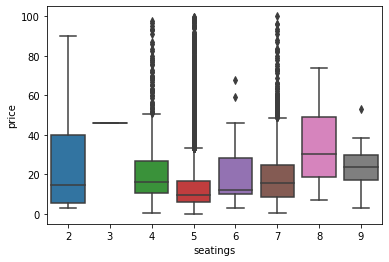

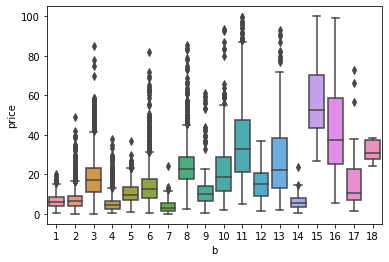

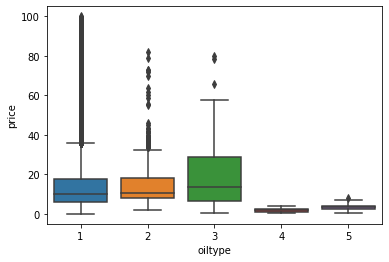

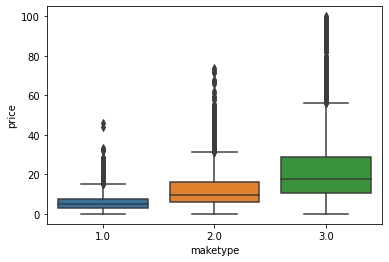

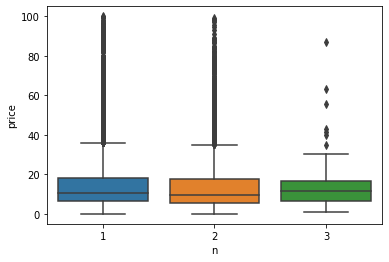

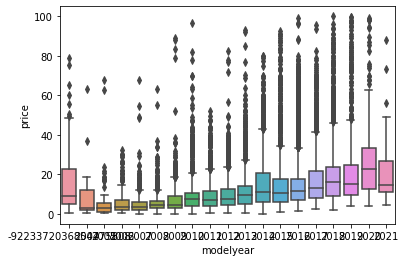

<Figure size 432x288 with 0 Axes>

In [ ]:

num_disc=['transferCount','seatings','b','oiltype','maketype','n','modelyear']
for feature in list(set(numerical)-set(num_disc)):
    train=train_df[[feature,'price']]
    train=train.dropna()
    train=train[train_df['price'] < 100].reset_index(drop=True)
    fig, ax = plt.subplots(figsize=[10, 10])

    sns.residplot(x=feature,y='price',data=train,scatter_kws={'alpha':0.8,'s':1})
    plt.ylabel('price', fontsize=20)
    plt.xlabel(feature, fontsize=20)
    plt.show()
    plt.cla()
    plt.clf()
for feature in num_disc:
    train=train_df[[feature,'price']]
    train=train.dropna()
    train=train[train_df['price'] < 100].reset_index(drop=True)

    sns.boxplot(x=feature,y='price',data=train)
 
    plt.show()
    plt.cla()
    plt.clf()


     

In [ ]:
print(train_df.columns)
print(train_df)

Index(['brand', 'serial', 'model', 'color', 'cityId', 'carCode', 'country',
       'a', 'c', 'f', 'h', 'i', 'j', 'k', 'o', 'price', 'carid', 'e',
       'transferCount', 'd', 'seatings', 'mileage', 'b', 'oiltype', 'newprice',
       'maketype', 'm', 'gearbox', 'n', 'displacement', 'tradeTime',
       'registerDate', 'licenseDate', 'modelyear', 'g', 'l1', 'l2', 'l3', 'l4',
       'l5', 'l6'],
      dtype='object')
       brand  serial  model  color  cityId  carCode   country    a  c  f  ...  \
0          1       1      1      1       1      1.0  779413.0  1.0  1  1  ...   
1          2       2      2      1       2      1.0  779415.0  1.0  2  2  ...   
2          5       5      5      1       2      3.0       NaN  1.0  2  2  ...   
3          6       6      6      1       3      1.0  779413.0  1.0  2  1  ...   
4          7       7      7      4       1      2.0  779415.0  1.0  2  1  ...   
...      ...     ...    ...    ...     ...      ...       ...  ... .. ..  ...   
29995     34    

In [ ]:
MI_df = {'feature':[], 'MI': []}
continu_features=numerical
discret_features=list(train_df.drop(columns=numerical).columns)
discret_features.remove('price')
print(discret_features)

['brand', 'serial', 'model', 'color', 'cityId', 'carCode', 'country', 'a', 'c', 'f', 'h', 'i', 'j', 'k', 'o']


    Feature        MI
0     model  2.268329
1    serial  1.240989
2     brand  0.484271
3         k  0.277684
4   country  0.219813
5         h  0.183515
6    cityId  0.120265
7   carCode  0.108544
8         f  0.085568
9     color  0.052032
10        i  0.028028
11        j  0.015140
12        o  0.002685
13        c  0.000973
14        a  0.000463


<AxesSubplot:xlabel='Feature', ylabel='MI'>

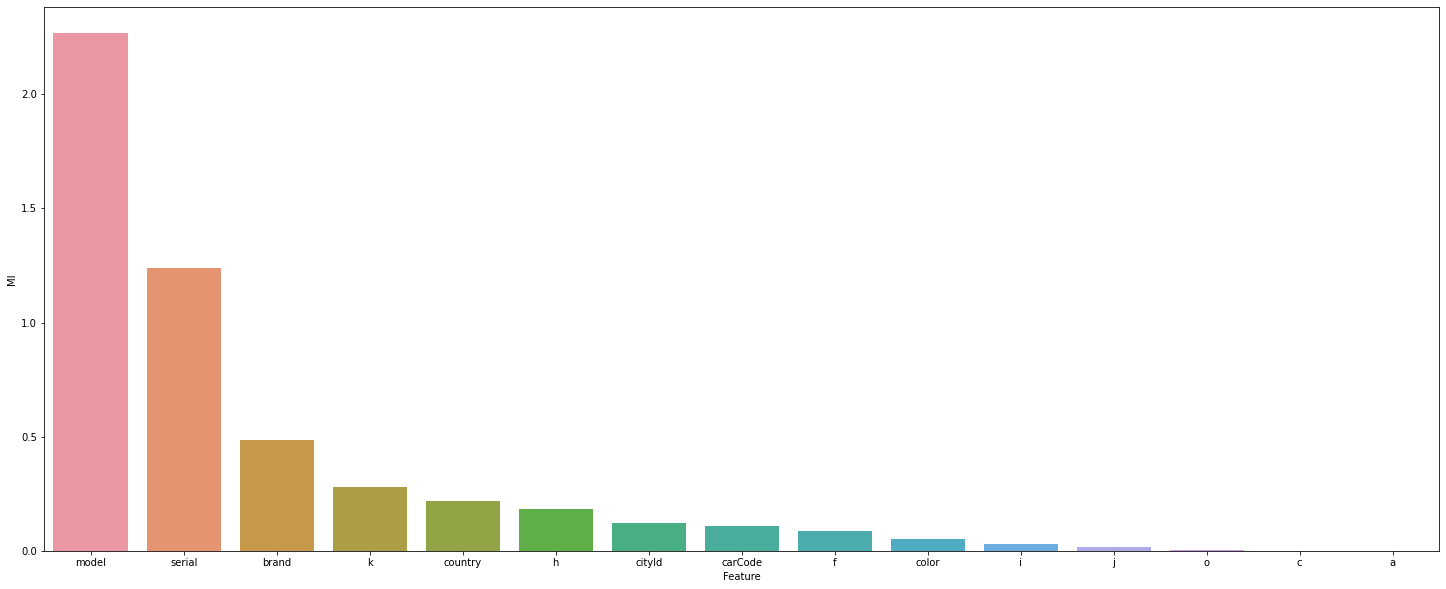

In [ ]:
dict_disc={'Feature':[],'MI':[]}

continu_features=numerical
for feature in discret_features:
    train=train_df[[feature,'price']]
    train=train.dropna()
    MI_disc = mutual_info_regression(train[[feature]].to_numpy(), train['price'].to_numpy(), discrete_features=True)
    dict_disc['Feature'].append(feature)
    dict_disc['MI'].append(MI_disc[0])
MI_DISC=pd.DataFrame(dict_disc).sort_values(by='MI',ignore_index=True,ascending=False)
print(MI_DISC)
plt.figure(figsize=(25,10))
sns.barplot(x='Feature',y='MI',data=MI_DISC)

<AxesSubplot:xlabel='feature', ylabel='MI'>

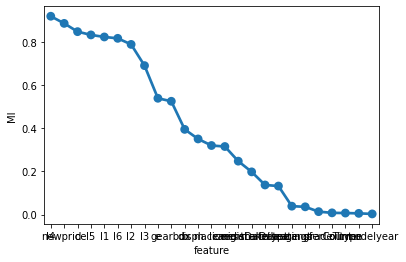

In [ ]:

dict_cts={'feature':[],'MI':[]}

continu_features=numerical
for feature in numerical:
    train=train_df[[feature,'price']]
    train=train.dropna()
    MI_cts = mutual_info_regression(train[[feature]].to_numpy(), train['price'].to_numpy(), discrete_features=False)
    dict_cts['feature'].append(feature)
    dict_cts['MI'].append(MI_cts[0])
    
MI_df = pd.DataFrame(dict_cts).sort_values(by='MI', ignore_index=True, ascending = False)


    


<AxesSubplot:xlabel='feature', ylabel='MI'>

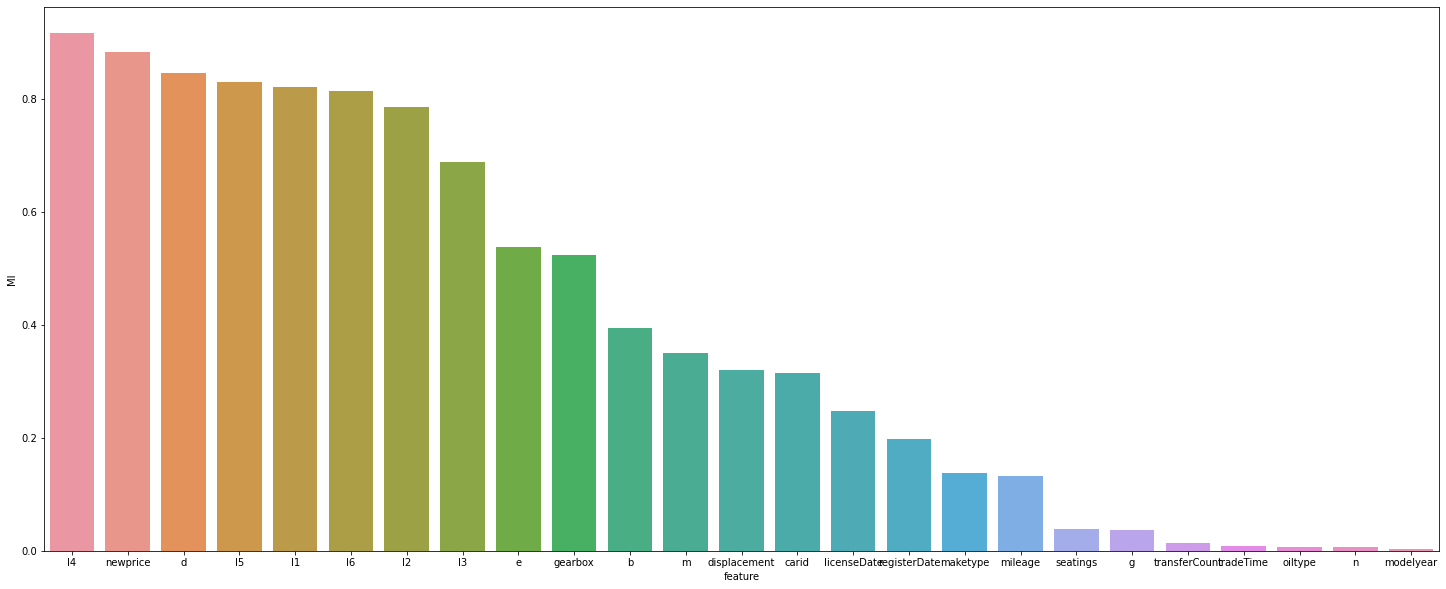

In [ ]:
plt.figure(figsize=(25,10))
sns.barplot(x='feature',y='MI',data=MI_df)

In [ ]:
train_df

       brand  serial  model  color  cityId  carCode   country    a  c  f  ...  \
0          1       1      1      1       1      1.0  779413.0  1.0  1  1  ...   
1          2       2      2      1       2      1.0  779415.0  1.0  2  2  ...   
2          5       5      5      1       2      3.0       NaN  1.0  2  2  ...   
3          6       6      6      1       3      1.0  779413.0  1.0  2  1  ...   
4          7       7      7      4       1      2.0  779415.0  1.0  2  1  ...   
...      ...     ...    ...    ...     ...      ...       ...  ... .. ..  ...   
29995     34     588   4169      5      35      3.0  779413.0  1.0  2  6  ...   
29996     12      92   1797      2       1      2.0  779415.0  1.0  2  2  ...   
29997      7     113    501      6       1      2.0  779415.0  1.0  2  2  ...   
29998     45     131   3024      1       1      1.0  779415.0  1.0  2  2  ...   
29999     55     229   5838      1      13      1.0       NaN  1.0  2  2  ...   

       registerDate  licens

In [ ]:
train_df[train_df['price'] < 0]

,carid,tradeTime,brand,serial,model,mileage,color,cityId,carCode,transferCount,...,m,n,o,price,l1,l2,l3,l4,l5,l6


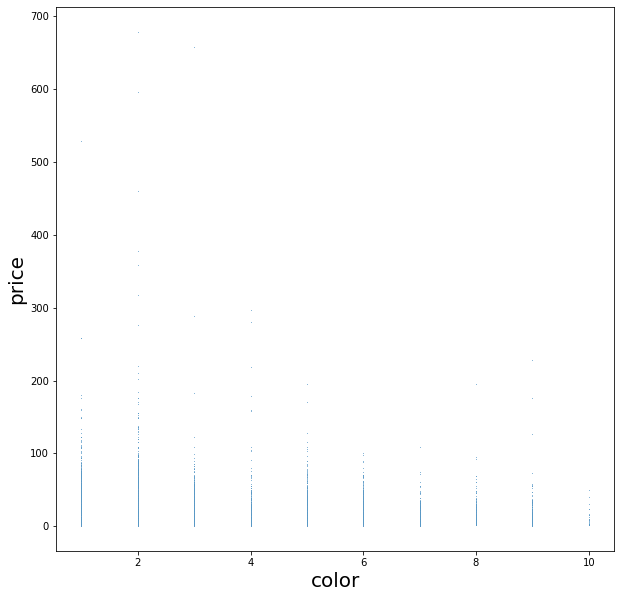

<Figure size 432x288 with 0 Axes>

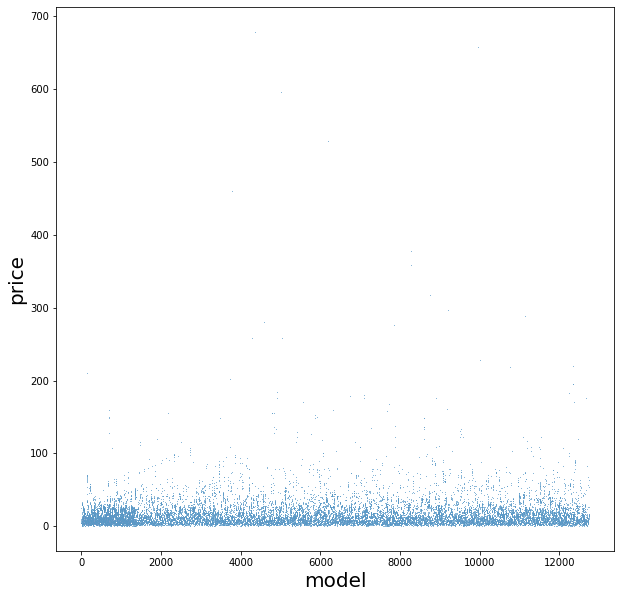

<Figure size 432x288 with 0 Axes>

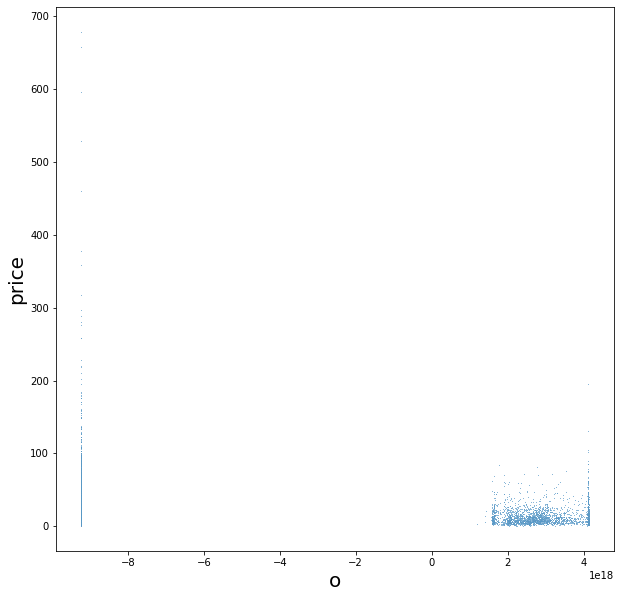

<Figure size 432x288 with 0 Axes>

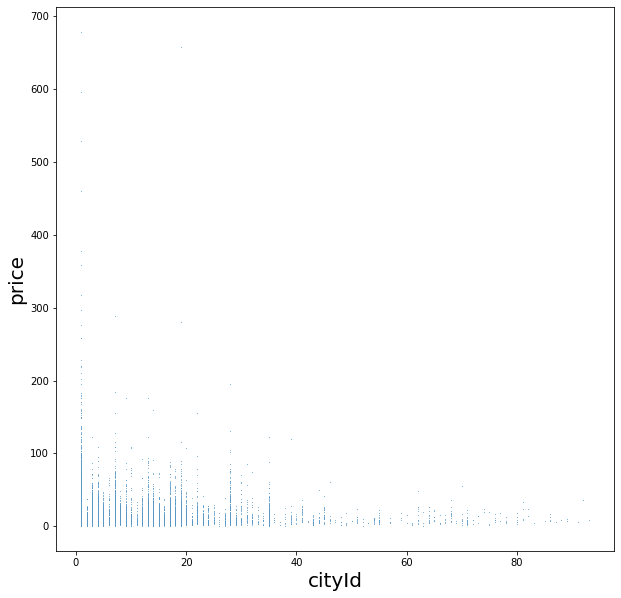

<Figure size 432x288 with 0 Axes>

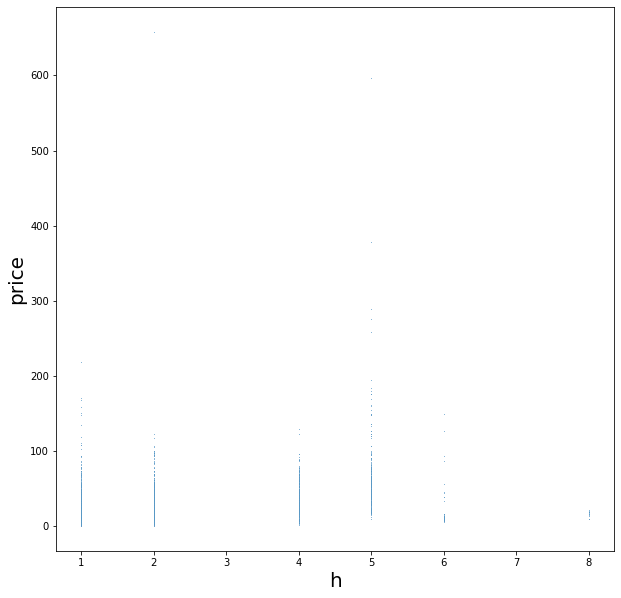

<Figure size 432x288 with 0 Axes>

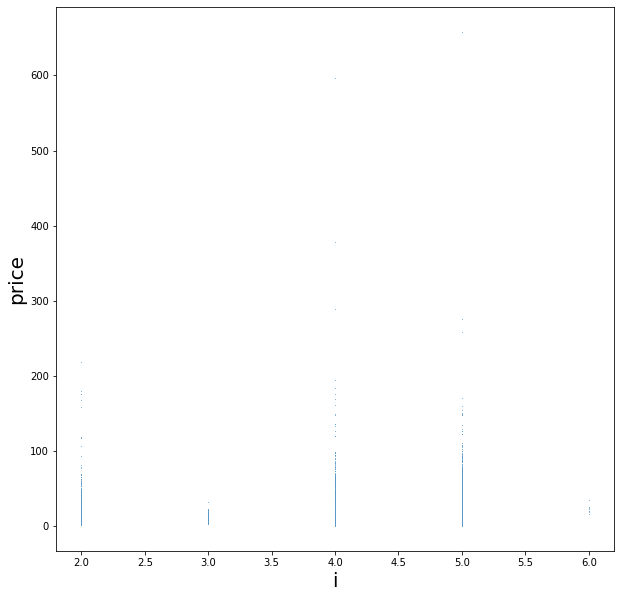

<Figure size 432x288 with 0 Axes>

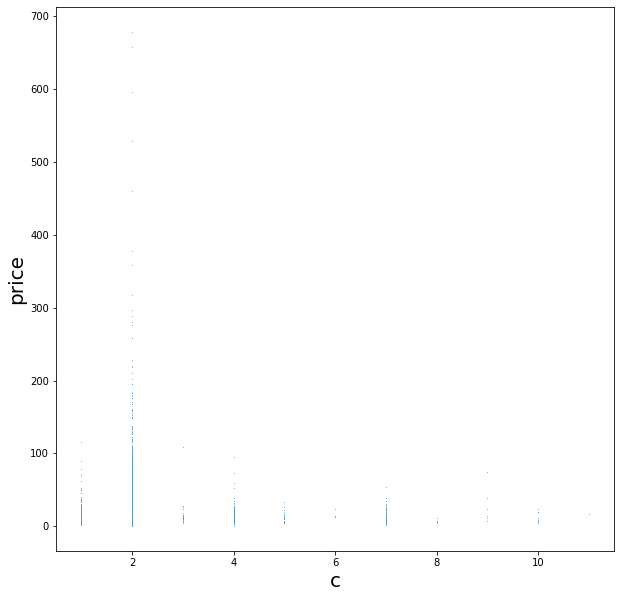

<Figure size 432x288 with 0 Axes>

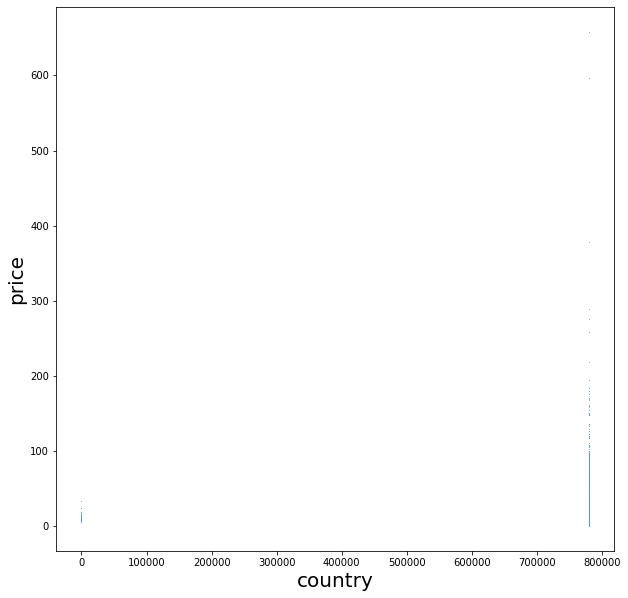

<Figure size 432x288 with 0 Axes>

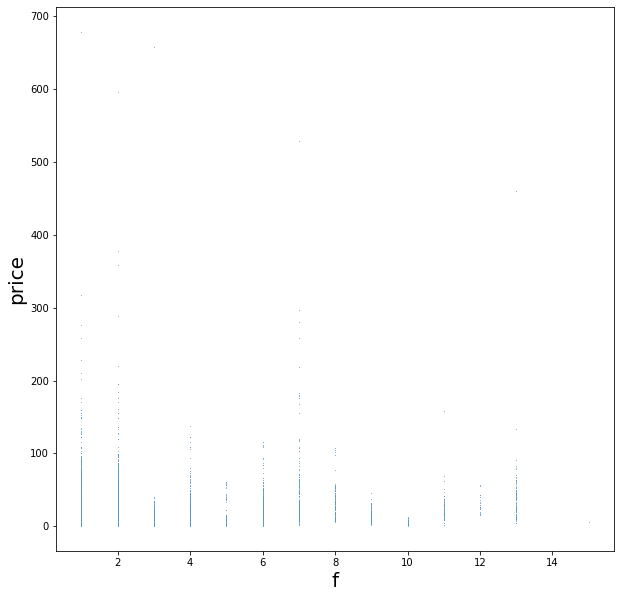

<Figure size 432x288 with 0 Axes>

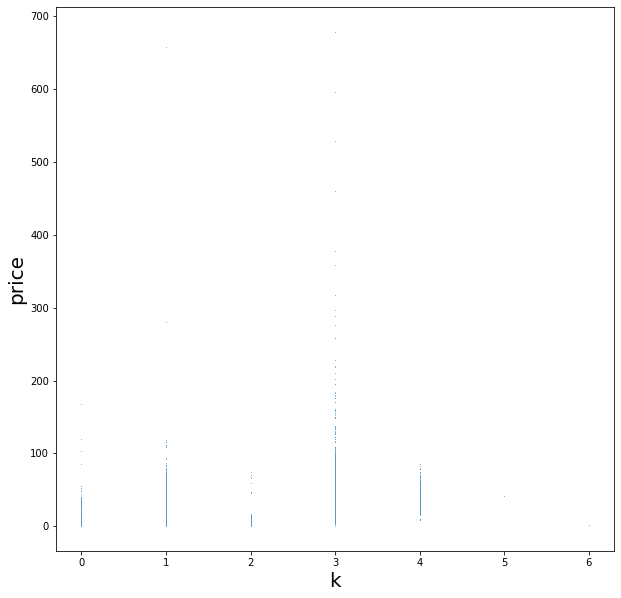

<Figure size 432x288 with 0 Axes>

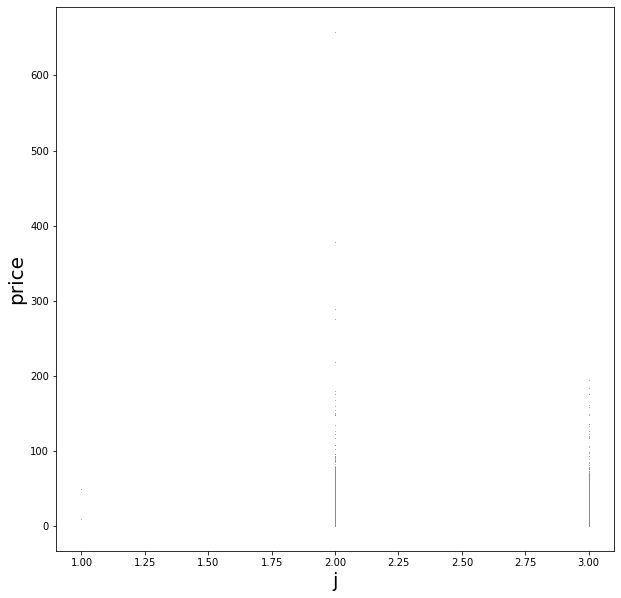

<Figure size 432x288 with 0 Axes>

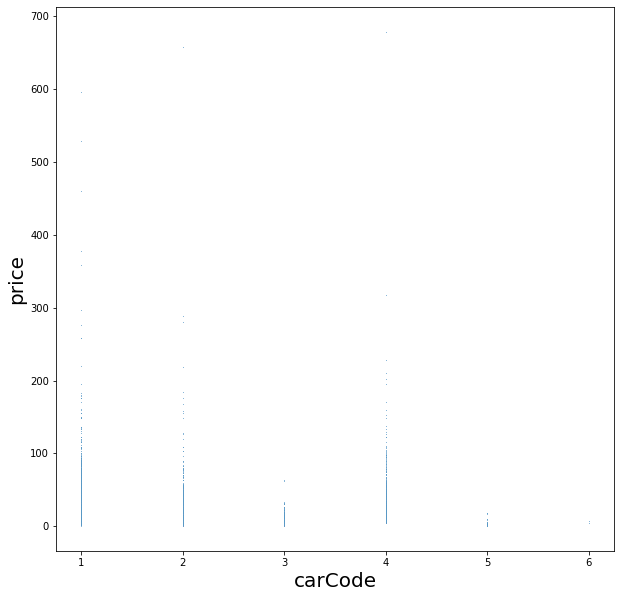

<Figure size 432x288 with 0 Axes>

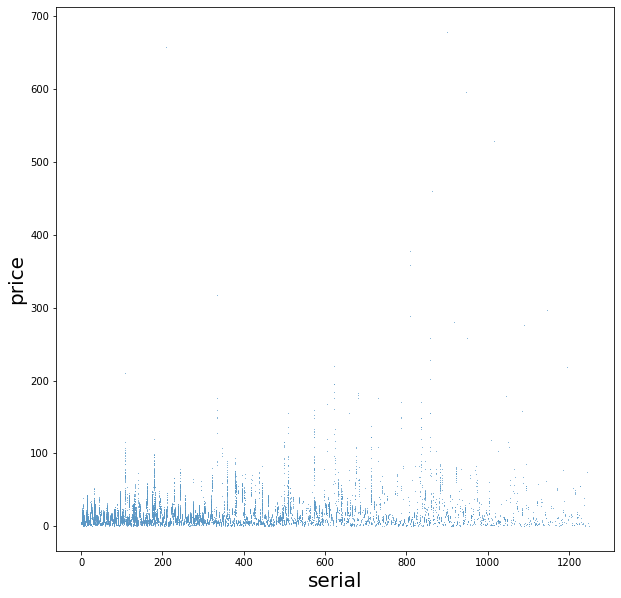

<Figure size 432x288 with 0 Axes>

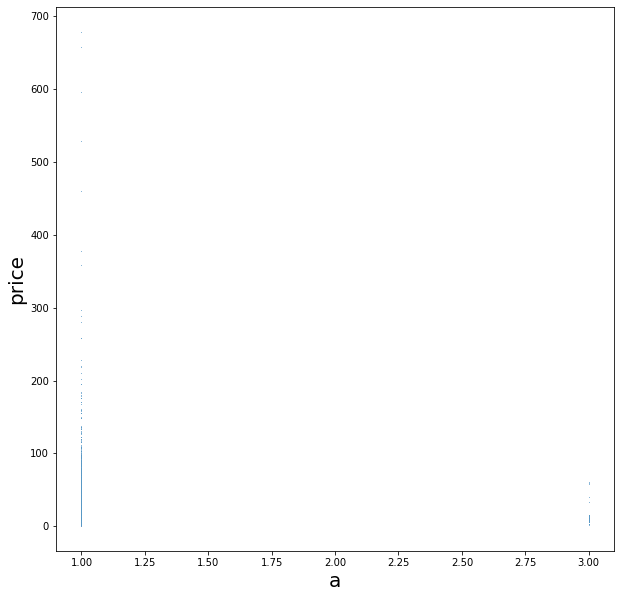

<Figure size 432x288 with 0 Axes>

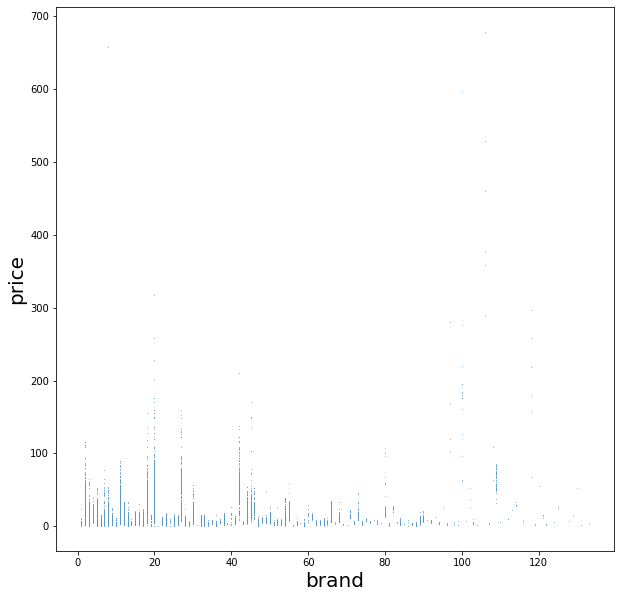

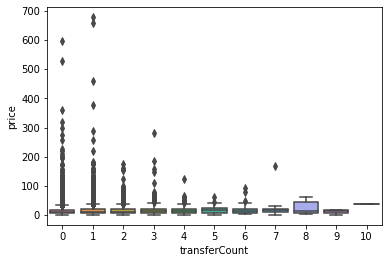

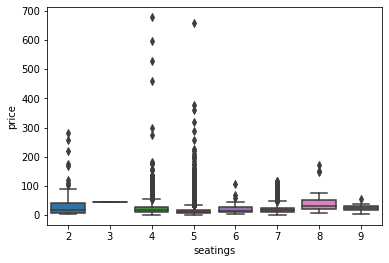

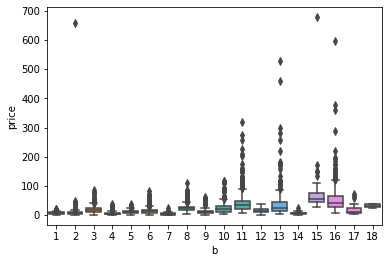

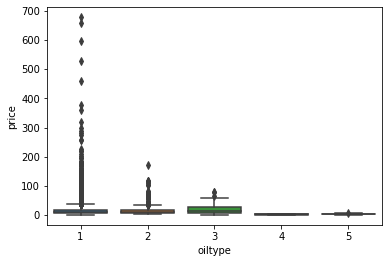

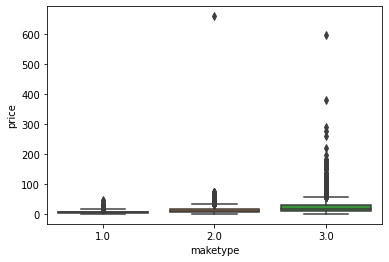

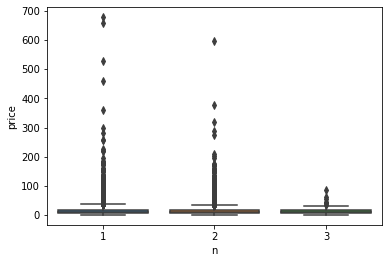

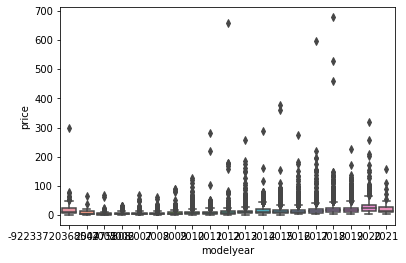

<Figure size 432x288 with 0 Axes>

In [ ]:
for feature in category_type:
    train=train_df[[feature,'price']]
    train.dropna(inplace=True)
    
    train=train[train_df['price'] < 1000].reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=[10, 10])

    sns.scatterplot(x=feature,y='price',data=train,alpha = 0.8, s = 1)

    plt.ylabel('price', fontsize=20)
    plt.xlabel(feature, fontsize=20)
    plt.show()
    plt.cla()
    plt.clf()
for feature in num_disc:
    train=train_df[[feature,'price']]
    train.dropna()
    train=train[train_df['price'] < 1000].reset_index(drop=True)
    sns.boxplot(x=feature,y='price',data=train) 
    plt.show()
    plt.cla()
    plt.clf()

In [ ]:
category_type_disc=['country','c','i','h','color','carCode','j','k','f']
category_type_cts=list(set(category_type)-set(category_type_disc))
print(category_type_cts)

['model', 'o', 'cityId', 'serial', 'a', 'brand']


<AxesSubplot:xlabel='feature', ylabel='MI'>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

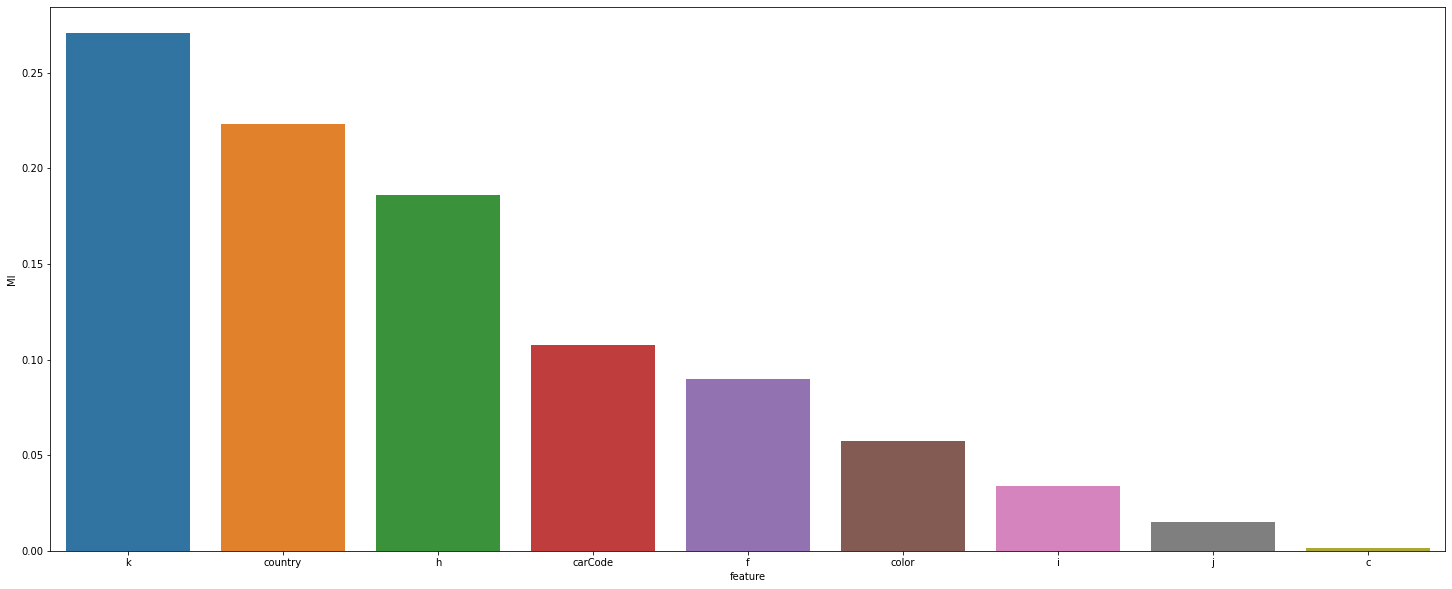

In [ ]:
cate_dict_disc={'feature':[],'MI':[]}


for feature in category_type_disc:
    train=train_df[[feature,'price']]
    train=train.dropna()
    MI_disc = mutual_info_regression(train[[feature]].to_numpy(), train['price'].to_numpy(), discrete_features=True)
    cate_dict_disc['feature'].append(feature)
    cate_dict_disc['MI'].append(MI_disc[0])
    plt.figure(figsize=(25,10))
MI_CATE=pd.DataFrame(cate_dict_disc).sort_values(by='MI',ascending=False)
sns.barplot(x='feature',y='MI',data=MI_CATE)

In [ ]:
print(category_type_cts)
print(MI_CATE)

['model', 'o', 'cityId', 'serial', 'a', 'brand']
   feature        MI
7        k  0.276425
0  country  0.212208
3        h  0.185359
5  carCode  0.104302
8        f  0.087926
4    color  0.054441
2        i  0.027494
6        j  0.011171
1        c  0.000971


   feature        MI
7        k  0.270757
0  country  0.223338
3        h  0.186025
5  carCode  0.107616
8        f  0.090055
4    color  0.057386
2        i  0.034101
6        j  0.015150
1        c  0.001407
0    brand  0.055704
1   serial  0.033811
2   cityId  0.024404
3    model  0.018506
4        a  0.008104
5        o  0.004233


<AxesSubplot:xlabel='feature', ylabel='MI'>

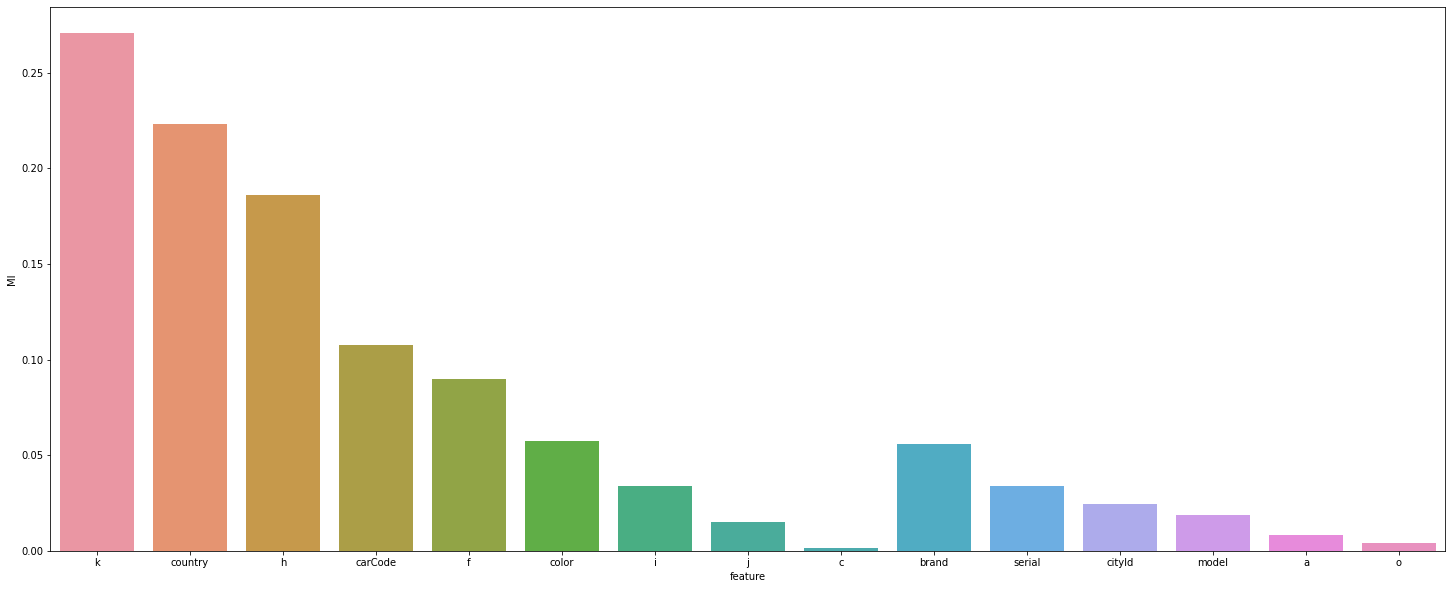

In [ ]:
cate_dict_cts={'feature':[],'MI':[]}


for feature in category_type_cts:
    train=train_df[[feature,'price']]
    train=train.dropna()
    MI_cts = mutual_info_regression(train[[feature]].to_numpy(), train['price'].to_numpy(), discrete_features=False)
    cate_dict_cts['feature'].append(feature)
    cate_dict_cts['MI'].append(MI_cts[0])
MI_CATE2=pd.DataFrame(cate_dict_cts).sort_values(by='MI', ignore_index=True, ascending = False)    
MI_CATE=pd.concat([MI_CATE,MI_CATE2])
print(MI_CATE)
plt.figure(figsize=(25,10))
sns.barplot(x='feature',y='MI',data=MI_CATE)

